In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2.4.1. Data Analysis

Read the data file

In [2]:
data = pd.read_csv('../data/Stock_Bond.csv', parse_dates=[0], index_col=0)

In [3]:
data.head()

,GM_Volume,GM_AC,F_Volume,F_AC,UTX_Volume,UTX_AC,CAT_Volume,CAT_AC,MRK_Volume,MRK_AC,...,XOM_Volume,XOM_AC,S&P_AC,S&P_Volume,1 year Treasury Constant Maturity Rate,3-Year Treasury Constant Maturity Rate,10 year Treasury Constant Maturity Rate,30 year Treasury Constant Maturity Rate,Aaa Bond Yield,Baa Bond Yield
Date,,,,,,,,,,,,,,,,,,,,,
1987-01-02,922200,11.45,2540100,2.31,1130400,3.66,1218400,3.38,14454000,4.02,...,3611200,4.52,246.45,91880000,5.86,6.48,7.18,7.44,8.49,9.97
1987-01-05,2100000,11.73,8670000,2.40,3032800,3.70,1752000,3.48,11538000,4.10,...,9040000,4.63,252.19,181900000,5.85,6.41,7.08,7.35,8.44,9.90
1987-01-06,2720000,11.77,6992000,2.43,6614400,3.74,1206400,3.48,14279400,4.07,...,7931200,4.62,252.78,189300000,5.85,6.42,7.08,7.36,8.41,9.86
1987-01-07,2000400,11.83,7621200,2.53,4233600,3.78,2188000,3.45,13003200,4.08,...,5351200,4.61,255.33,190900000,5.78,6.37,7.05,7.33,8.40,9.82
1987-01-08,2460000,11.66,5807500,2.51,3816800,3.82,2195200,3.44,16320600,4.13,...,9680000,4.61,257.28,194500000,5.78,6.36,7.04,7.31,8.37,9.76


Print the column names

In [4]:
data.columns

Index(['GM_Volume', 'GM_AC', 'F_Volume', 'F_AC', 'UTX_Volume', 'UTX_AC',
       'CAT_Volume', 'CAT_AC', 'MRK_Volume', 'MRK_AC', 'PFE_Volume', 'PFE_AC',
       'IBM_Volume', 'IBM_AC', 'MSFT_Volume', 'MSFT_AC', 'C_Volume', 'C_AC',
       'XOM_Volume', 'XOM_AC', 'S&P_AC', 'S&P_Volume',
       '1 year Treasury Constant Maturity Rate',
       '3-Year Treasury Constant Maturity Rate',
       '10 year Treasury Constant Maturity Rate',
       '30 year Treasury Constant Maturity Rate', 'Aaa Bond Yield',
       'Baa Bond Yield'],
      dtype='object')

Plot the prices of GM and F

Text(0.5, 1.0, 'F')

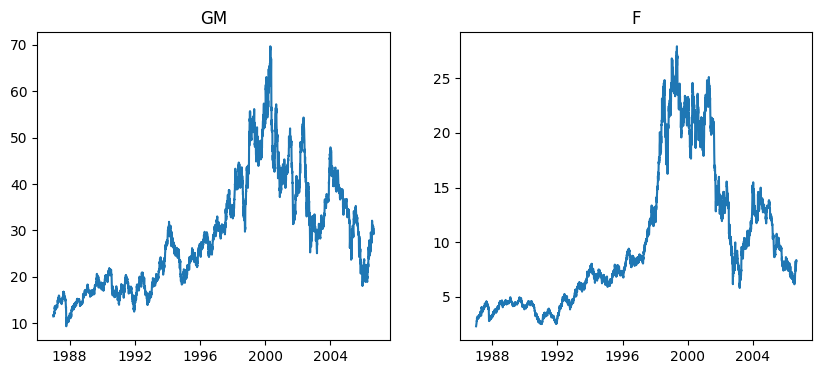

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(data.GM_AC)
axs[0].set_title('GM')

axs[1].plot(data.F_AC)
axs[1].set_title('F')

Find the number of rows in the dataframe

In [6]:
data.shape[0]

4963

Calculate and plot returns of the two stocks against each other

In [7]:
def ret(prices):
    return prices / prices.shift(1) - 1

In [8]:
GM_ret = ret(data.GM_AC).dropna()
F_ret = ret(data.F_AC).dropna()

An alternative way to calculate returns using pct_change()

In [9]:
pd.testing.assert_series_equal(GM_ret, data.GM_AC.pct_change().dropna())
pd.testing.assert_series_equal(F_ret, data.F_AC.pct_change().dropna())

Plot the returns against each other

Text(0, 0.5, 'F return')

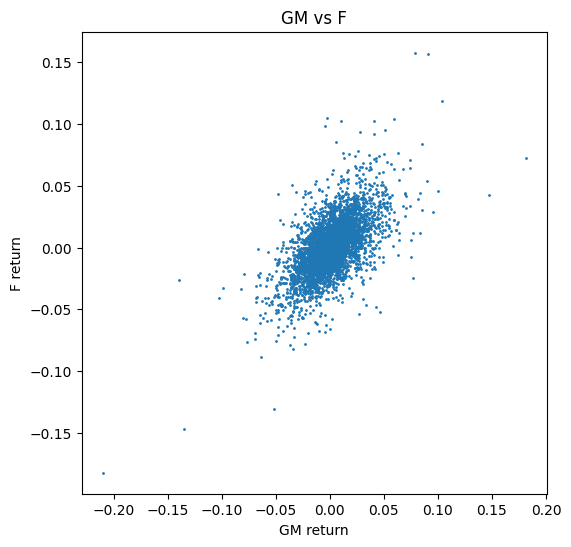

In [10]:
fig, axs = plt.subplots(1, 1, figsize=(6, 6))

axs.scatter(GM_ret, F_ret, s=1, alpha=1)
axs.set_title('GM vs F')
axs.set_xlabel('GM return')
axs.set_ylabel('F return')

#### **Problem 1.** The returns are positively correlated. The outliers often tend to occur simultaneously for both stock.

In [11]:
np.corrcoef(GM_ret, F_ret)[0, 1]

0.6139335451404808

#### **Problem 2.** Returns vs log returns

In [12]:
def log_ret(prices):
    return np.log(prices / prices.shift(1))

In [13]:
GM_log_ret = log_ret(data.GM_AC).dropna()

Text(0, 0.5, 'Return')

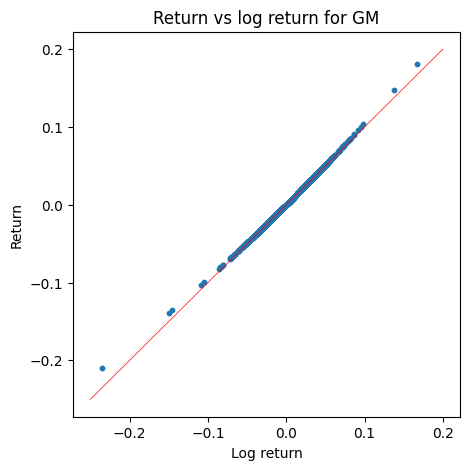

In [14]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

axs.plot([-0.25, 0.2], [-0.25, 0.2], color='r', linewidth=0.5)
axs.scatter(GM_log_ret, GM_ret, s=10, alpha=1)
axs.set_title('Return vs log return for GM')
axs.set_xlabel('Log return')
axs.set_ylabel('Return')

In [15]:
np.corrcoef(GM_log_ret.values, GM_ret.values)[0, 1]

0.9995408292145728

#### **Problem 3.** Repeat the exploration for MSFT and MRK

In [16]:
MSFT_ret = ret(data.MSFT_AC).dropna()
MRK_ret = ret(data.MRK_AC).dropna()

Plot the returns against each other

Text(0, 0.5, 'MRK return')

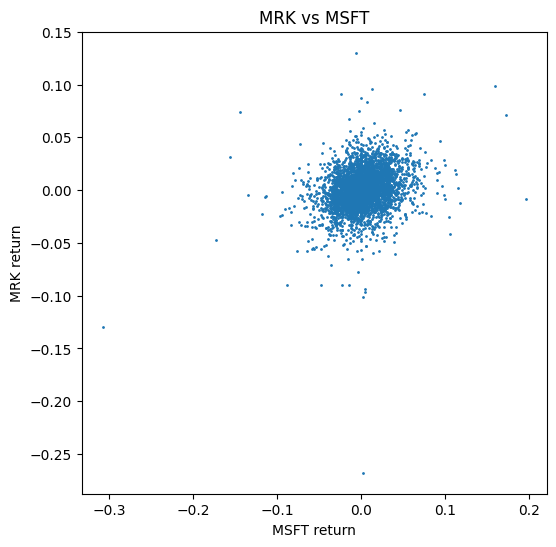

In [17]:
fig, axs = plt.subplots(1, 1, figsize=(6, 6))

axs.scatter(MSFT_ret, MRK_ret, s=1, alpha=1)
axs.set_title('MRK vs MSFT')
axs.set_xlabel('MSFT return')
axs.set_ylabel('MRK return')

The returns are largely uncorrelated:

In [18]:
np.corrcoef(MSFT_ret, MRK_ret)[0, 1]

0.2710327507080609

The outliers occur independently for each of the stocks.

### 2.4.2 Simulations

#### **Problem 4.**

In [19]:
rng = np.random.default_rng(12345)

In [20]:
days_in_year = 253

In [21]:
samples = 100000
days = 45
mu = 0.05
sigma = 0.23
initial_position = 1_000_000
investment = 50_000

In [22]:
mu_daily = mu / days_in_year
sigma_daily = sigma / np.sqrt(days_in_year)

In [23]:
log_rets = rng.normal(mu_daily, sigma_daily, size=(samples, days))
log_price = np.log(initial_position) + log_rets.cumsum(axis=1)

Probability of losing the initial investment:

In [24]:
(log_price < np.log(initial_position - investment)).any(axis=1).sum() / samples

0.5106

#### **Problem 5.**

In [25]:
rng = np.random.default_rng(12345)

In [26]:
samples = 1_000_000
days = 100
mu = 0.05
sigma = 0.23
initial_position = 1_000_000
investment = 50_000
exit_threshold = 100_000

In [27]:
log_rets = rng.normal(mu_daily, sigma_daily, size=(samples, days))
log_price = np.log(initial_position) + np.cumsum(log_rets, axis=1)

Some examples of price evolution:

In [28]:
selected_samples = rng.choice(log_price.shape[0], size=10)

Text(0, 0.5, 'Position value')

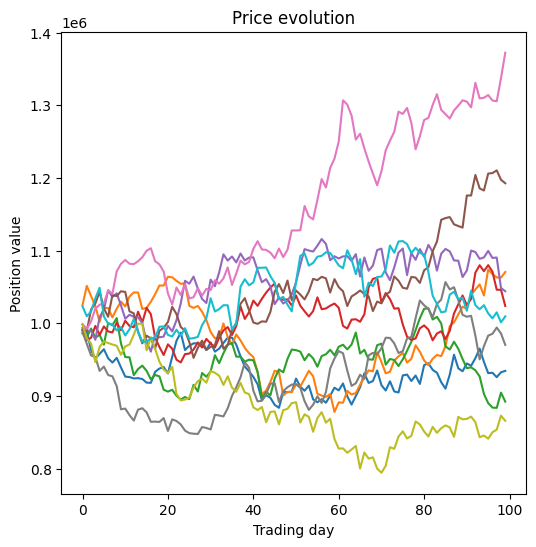

In [29]:
fig, axs = plt.subplots(1, 1, figsize=(6, 6))

axs.plot(np.exp(log_price[selected_samples]).T)
axs.set_title('Price evolution')
axs.set_xlabel('Trading day')
axs.set_ylabel('Position value')

In [30]:
def find_first_hit(condition, price):
    any_hit = condition.any(axis=1)
    hit_idx = np.argmax(condition, axis=1)
    price_at_hit = np.where(any_hit, price[np.arange(price.shape[0]), hit_idx], np.nan)
    hit_idx_adj = np.where(any_hit, hit_idx, np.nan)
    return any_hit, hit_idx_adj, price_at_hit

In [31]:
early_loss, early_loss_idx, early_loss_price = find_first_hit(log_price < np.log(initial_position - investment), log_price)
early_gain, early_gain_idx, early_gain_price = find_first_hit(log_price >= np.log(initial_position + exit_threshold), log_price)

Probability of an early loss:

In [32]:
p_early_loss = (early_loss & ((~early_gain) | (early_loss_idx < early_gain_idx))).sum() / samples
p_early_loss

0.586979

Probability of an early gain:

In [33]:
p_early_gain = (early_gain & ((~early_loss) | (early_gain_idx < early_loss_idx))).sum() / samples
p_early_gain

0.38846

Probabity of reaching the end of the period:

In [34]:
p_end = ((~early_loss) & (~early_gain)).sum() / samples
p_end

0.024561

In [35]:
p_early_loss + p_early_gain + p_end

1.0

Histogram of hitting the early loss time

Text(0.5, 1.0, 'Early gain hitting time')

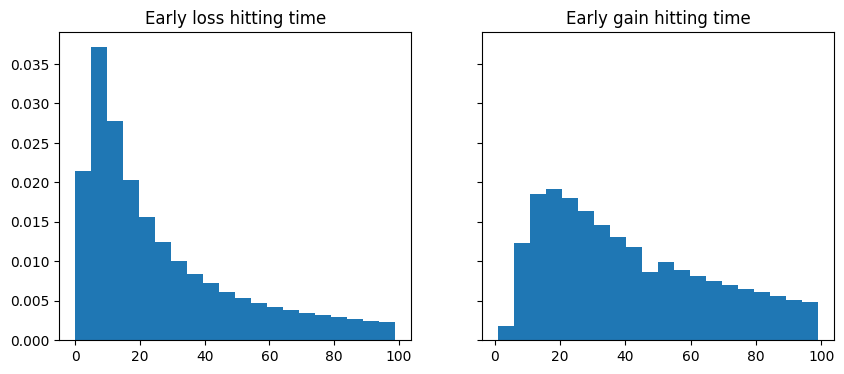

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

axs[0].hist(early_loss_idx, bins=20, density=True)
axs[0].set_title('Early loss hitting time')

axs[1].hist(early_gain_idx, bins=20, density=True)
axs[1].set_title('Early gain hitting time')

Distribution of profit/loss for the strategy:

In [37]:
sell_price = np.where(
    early_loss & ((~early_gain) | (early_loss_idx < early_gain_idx)),
    early_loss_price,
    np.where(early_gain, early_gain_price, log_price[:, -1])
)

In [38]:
profit = np.exp(sell_price) - initial_position

Text(0.5, 1.0, 'Profit distribution')

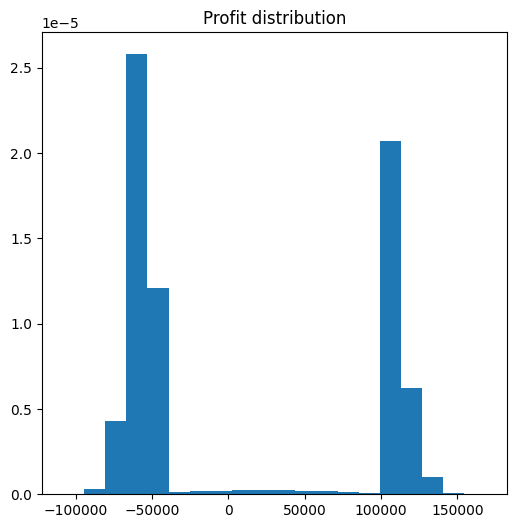

In [39]:
fig, axs = plt.subplots(1, 1, figsize=(6, 6))

axs.hist(profit, bins=20, density=True)
axs.set_title('Profit distribution')

Probability of making at least $100,000:

In [40]:
(profit >= 100_000).sum() / samples

0.38846

Probabity of making a loss:

In [41]:
(profit < 0).sum() / samples

0.593843

Expected profit of the strategy

In [42]:
np.mean(profit)

9084.650743304539

**Problem 8.** Expected annualised return

In [43]:
r_exp = np.mean(profit) / investment / days * days_in_year
r_exp

0.4596833276112096

Volatility of return

In [44]:
vol_exp = np.std(profit / investment, ddof=1) / np.sqrt(days / days_in_year)
vol_exp

2.590242170151478

Sharpe ratio of the strategy

In [45]:
r_exp / vol_exp

0.17746731672750396

### 2.4.3. Simulating a Geometric Random Walk

In [46]:
rng = np.random.default_rng(12345)

In [47]:
samples = 9
days = 253
mu = 0.05
sigma = 0.20
initial_position = 120

In [48]:
mu_daily = mu / days_in_year
sigma_daily = sigma / np.sqrt(days_in_year)

In [49]:
log_rets = rng.normal(mu_daily, sigma_daily, size=(samples, days))
log_rets = np.hstack([np.zeros((samples, 1)), log_rets])
price = initial_position * np.exp(np.cumsum(log_rets, axis=1))

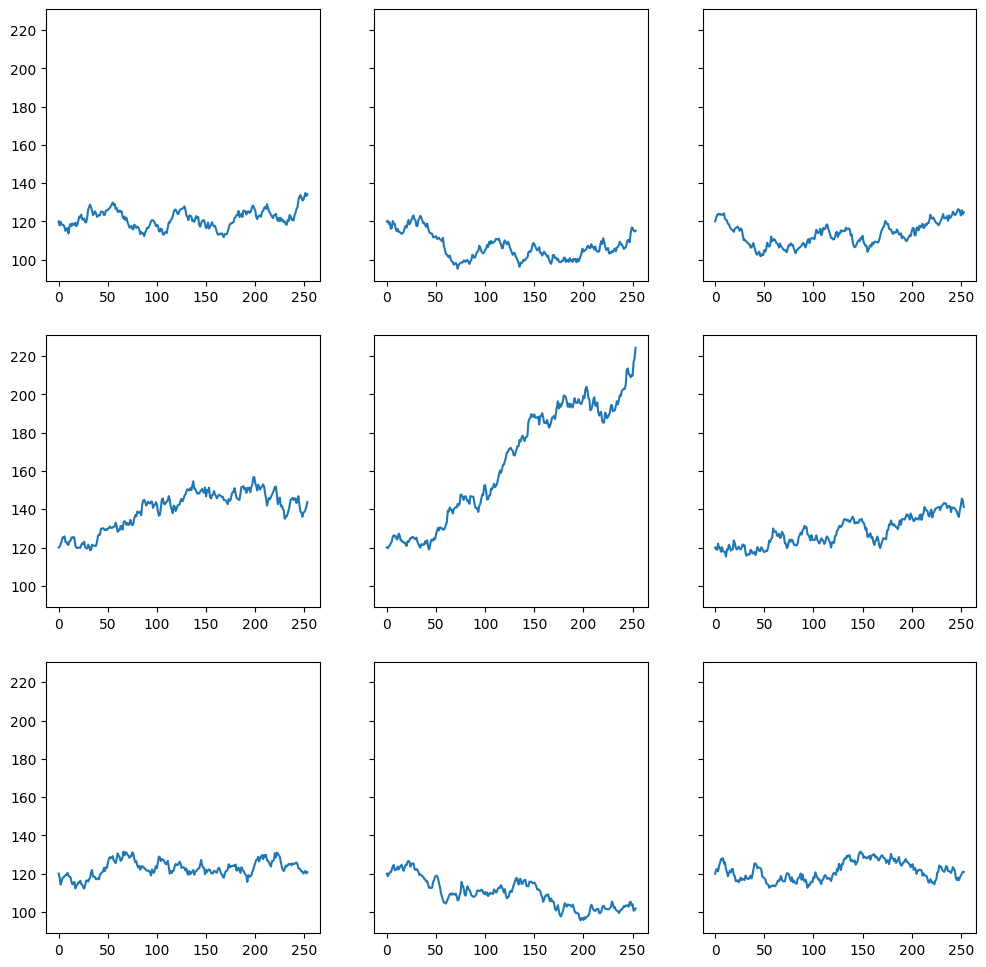

In [50]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12), sharey=True)

for i in range(3):
    for j in range(3):
        axs[i][j].plot(price[i * 3 + j])

**Problem 9.** Mean and standard deviation of log returns

In [51]:
np.mean(log_rets) * days_in_year

0.10284648819220474

In [52]:
np.std(log_rets, ddof=1) * np.sqrt(days_in_year)

0.2009477140664403

**Problem 10.** Log-returns are independent by construction. The appearance of moment can be caused by the fact that the returns have a positive mean, and the fact that the prices are multiplied by returns.

**Problem 11.** The code calculates the cumulative sums of returns up to each point in time, uses the cumulative returns to calculate the price, and prepends the initial price of 120 to vector.

### 2.4.4. Let's Look at McDonald's Stock

In [53]:
data = pd.read_csv('../data/MCD_PriceDaily.csv', parse_dates=[0], index_col=0)
data.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,62.63,63.07,62.31,62.78,5839300,53.99
2010-01-05,62.66,62.75,62.19,62.30,7099000,53.58
2010-01-06,62.20,62.41,61.06,61.45,10551300,52.85
2010-01-07,61.25,62.34,61.11,61.90,7517700,53.24
2010-01-08,62.27,62.41,61.60,61.84,6107300,53.19


In [54]:
adj_price = data['Adj Close']

**Problem 12.**

In [55]:
MCD_ret = ret(adj_price).dropna()
MCD_log_ret = log_ret(adj_price).dropna()

Text(0, 0.5, 'Return')

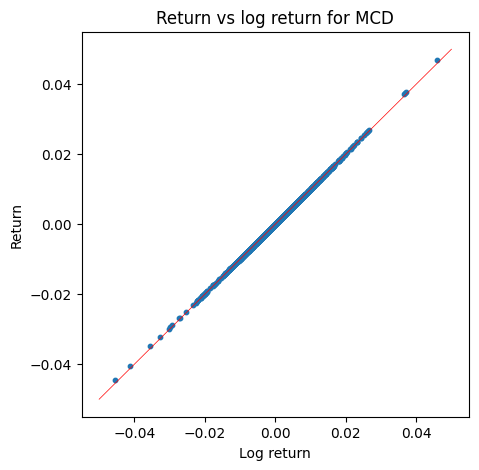

In [56]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

axs.plot([-0.05, 0.05], [-0.05, 0.05], color='r', linewidth=0.5)
axs.scatter(MCD_log_ret, MCD_ret, s=10, alpha=1)
axs.set_title('Return vs log return for MCD')
axs.set_xlabel('Log return')
axs.set_ylabel('Return')

It makes sense that the values are close since for small $x$ we have $\log(1 + x) \approx x$.

**Problem 13.**

Mean and standard deviation of returns:

In [57]:
np.mean(MCD_ret)

0.0005027479017916817

In [58]:
np.std(MCD_ret, ddof=1)

0.00890031928901851

Mean and standard deviation of log returns:

In [59]:
np.mean(MCD_log_ret)

0.0004630553179995088

In [60]:
np.std(MCD_log_ret, ddof=1)

0.008901467457248666

Since the values are close, the moments of their distributions can also be expected to be close.

**Problem 14.**

In [61]:
from scipy.stats import ttest_rel

In [62]:
ttest_rel(MCD_ret, MCD_log_ret)

TtestResult(statistic=15.865603933357201, pvalue=1.642607974463449e-51, df=1175)

The test rejects the null hypothesis at the 5% confidence level.

The assumptions of the t-test:
   * the sample mean is normally distributed,
   * the sample variance is $\chi^2$-distributed.

These assumptions are not strictly met, as the distribution of returns is not normal. The assumptions should be met approximately, however, due to the large sample size we use.

**Problem 15.** From the results of the t-test in the previous problem, the returns and log returns are not interchangeable.

In [63]:
rng = np.random.default_rng(12345)

In [64]:
samples = 10_000
days = 20
mu_daily = np.mean(MCD_log_ret)
sigma_daily = np.std(MCD_log_ret, ddof=1)
initial_position = 93.07

In [65]:
log_rets = rng.normal(mu_daily, sigma_daily, size=(samples, days))
log_rets = np.hstack([np.zeros((samples, 1)), log_rets])
price = initial_position * np.exp(np.cumsum(log_rets, axis=1))

In [66]:
p_win = (price < 85).any(axis=1).sum() / samples
p_win

0.0073

Expected payoff of the wager:

In [67]:
p_win * 100 + (1 - p_win) * (-1)

-0.26270000000000004

So this wager offer should not be taken up.

**Problem 17.**

In [68]:
p_extra = (price < 84.5).any(axis=1).sum() / samples
p_extra

0.0046

In [69]:
p_win * 100 + p_extra * 25 + (1 - p_win) * (-1)

-0.14770000000000005

This wager should still not be taken up.